# John O'Reilly 22254773 <br/>
CS5062 Etivity 1

<strong>1. Import Libraries</strong>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<strong> 2. Load Data to Pandas DataFrame</strong>

In [66]:
df = pd.read_csv('bank.csv')

<strong>Have a peek at the first and last few rows</strong>

In [25]:
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [26]:
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

We observe that the dataset has 1999 rows with 17 columns, both numeric and categeorical features. We can identify the last column, 'subscribed' as a good candidate as a feature to learn to predict using the values of other features, it seems to have yes/no range. We also observe some missing values, represented by 'NaN'.

<strong>Take a look at a quick summary of numeric values</strong>

In [28]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Here we observe some missing values for the 'age' feature, some negative values that we'd want to understand.

<strong>A little more detail</strong><br/>
Sugggests some missing values for categorical features, for example job and education. Later on we may wish to deal with these by dropping rows or imputing values.

In [29]:
print('Shape: ',df.shape)
print(df.info())
print(df.isnull().sum())


Shape:  (2000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB
None
age            12
job    

In [31]:
# Calculate skewness
numeric_cols = ['age','balance','day','duration','campaign','pdays','previous']
for(col) in numeric_cols:
    skewness = df[col].skew()
    print('Skewness of ',col,' is ',skewness)

Skewness of  age  is  0.8539211393488166
Skewness of  balance  is  11.461564406584934
Skewness of  day  is  0.4036607116303043
Skewness of  duration  is  2.0457872284021397
Skewness of  campaign  is  2.3208556590020866
Skewness of  pdays  is  0.9200063680161544
Skewness of  previous  is  5.461168203366145


Skewness quantifies the asymmetry of the feature variable about its mean <br/>

In the context of the balance feature, skewness helps describe the distribution of account balances. Plotting the skew we see that the tail on the right side of the distribution is 
longer than the left side. Suggests few customers with large balance, possibly these could beconsidered outliers.

In [39]:
plt.figure(figsize=(40, 60))
numeric_cols = ['age','balance','pdays','previous']
n=1
for(col) in numeric_cols:
    ax = plt.subplot(12,3,n)
    sns.histplot(df[col])
    plt.xlabel(col)
    n+=1
plt.show()

Balance and previous particularly jump out in the visualisation.

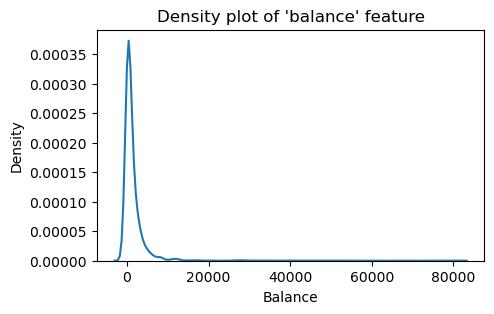

In [36]:
plt.figure(figsize=(5, 3)) 
sns.kdeplot(data=df, x='balance')
plt.title("Density plot of 'balance' feature")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.show()

In [50]:
# Compute the mean age per group -- too long to print
# print('mean_age:',df.groupby(['job', 'education'])['age'].mean())

mean_age = df.groupby(['job', 'education'])['age'].mean().reset_index()

# Create a pivot table so that the job is the index, the education is the column, and the values are the mean age
pivot_mean_age = mean_age.pivot_table(index='job', columns='education', values='age')

# Plot the mean age in a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_mean_age, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Mean Age'})
plt.title("Mean Age by Job and Education")
plt.xlabel("")
plt.ylabel("")
plt.show()

This visualisation helps us to understand the demographics within the dataset, revealing relationships between age, job types and education. For example we can see a very even split across the 'retired' category

Visualising categorical features wothh noting what I consider to be a very high level of success for 'poutcome'

In [74]:
plt.figure(figsize=(20,60))
categorical_cols = ['marital','education','contact','poutcome','job']
plotnumber = 1
for col in categorical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[col])
    plt.xlabel(col)
    plotnumber+=1
    if(col=='job'):
        plt.xticks(rotation=90)
plt.show()

<strong>Closer look at 'subscribed' </strong>
It's completely evenly balanced, wouldn't normally expect this. <br/>
Would take a look at null values first...

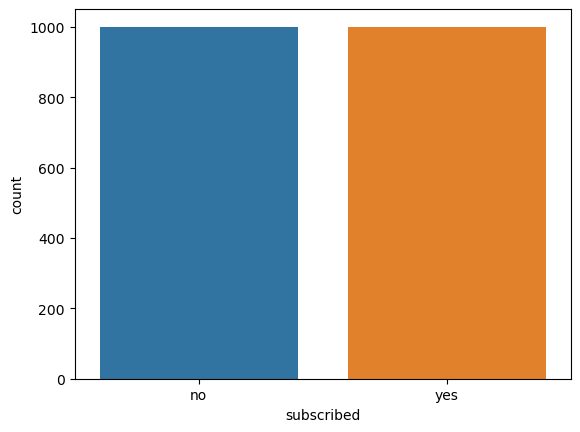

In [68]:
sns.countplot(x = "subscribed", data = df, label = "Count")
plt.show()

<strong>Looking at some other categories vs subscribed is helpful</strong><br/>
Some are kind of unexpected, for example the relative high proportion of student and unemployed that are subscribed. Could be sparce data for these categories.

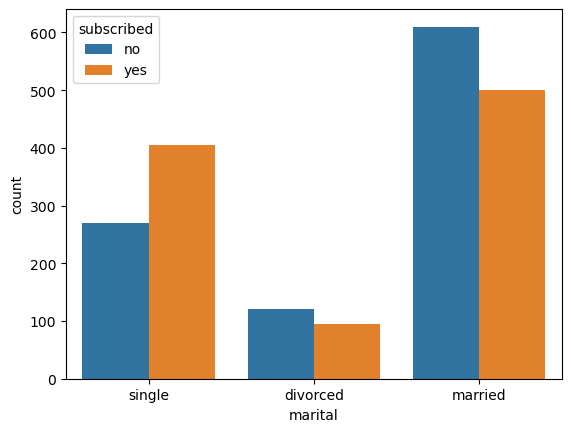

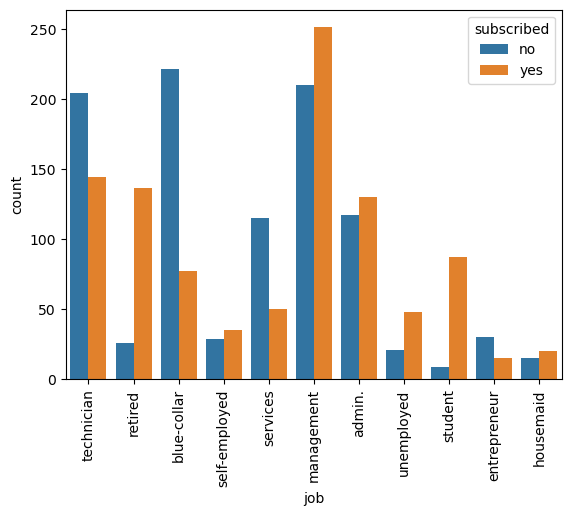

In [72]:
sns.countplot(x = "marital", data = df,hue = "subscribed")
plt.show()
sns.countplot(x = "job", data = df,hue = "subscribed")
plt.xticks(rotation=90)
plt.show()

Value counts shows how many examples for each job type

In [77]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

<Figure size 1200x800 with 0 Axes>

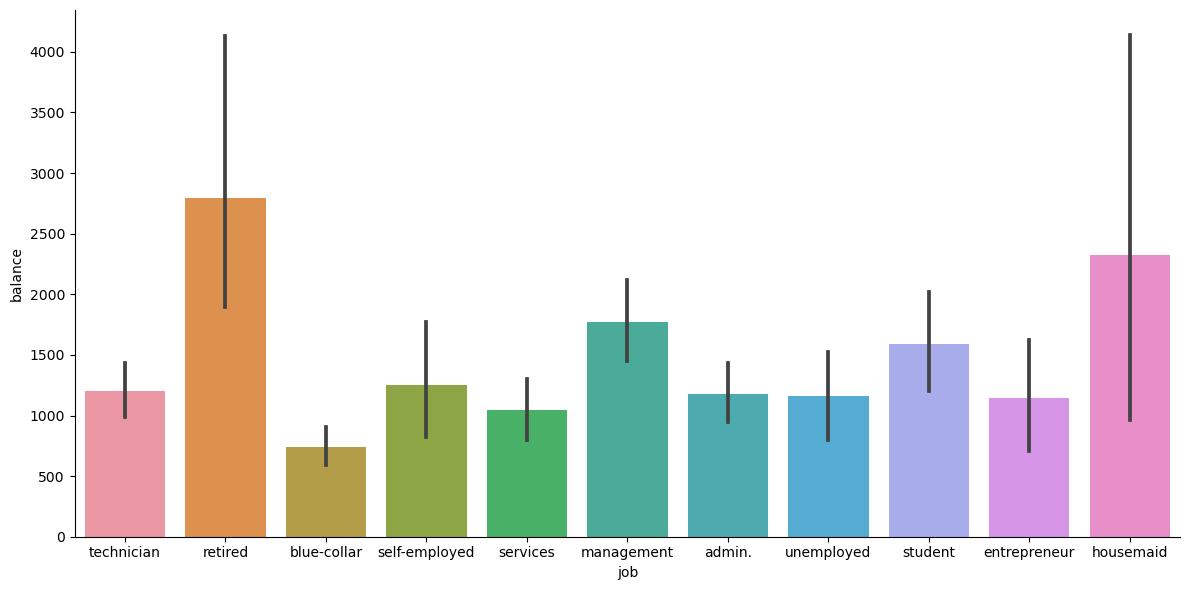

In [76]:
# Factrial plot with confidence interval
plt.figure(figsize=(12,8))
sns.catplot(x="job", y="balance", data=df, kind="bar", height=6, aspect=2)
plt.show()

Dont know if this contributes much. Shows confidence interval for balance for each job category.

<strong>Box and violin plots</strong>

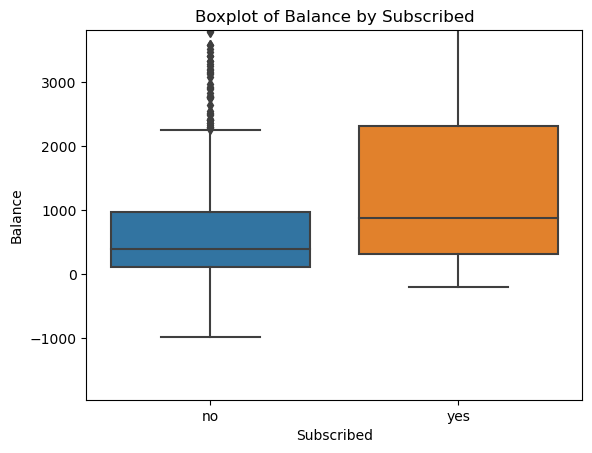

In [78]:
# Calculate the interquartile range (IQR)
Q1 = np.percentile(df['balance'], 25)
Q3 = np.percentile(df['balance'], 75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for the y-axis
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(x="subscribed",y="balance",data=df)

# Set the title and labels
plt.title('Boxplot of Balance by Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Balance')
plt.ylim(lower_bound, upper_bound)
plt.show()

I had to put in bounds on the y-axis due to outliers in the positive y direction making the chart unreadable. <br>
The box in the middle of the plot represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The height of the box indicates the spread of the data within the IQR. The larger box on the right suggests more variability, while the smaller box indicates on the right less.

The horizontal line inside the box is the median line(50th percentile), which is the middle value that separates the data into two halves. The position of the median line relative to the box's center incicates data's skewness. In both the line is closer to Q1, so the data is said to be right-skewed. The whiskers represent the spread of the data and out side of these are outliers

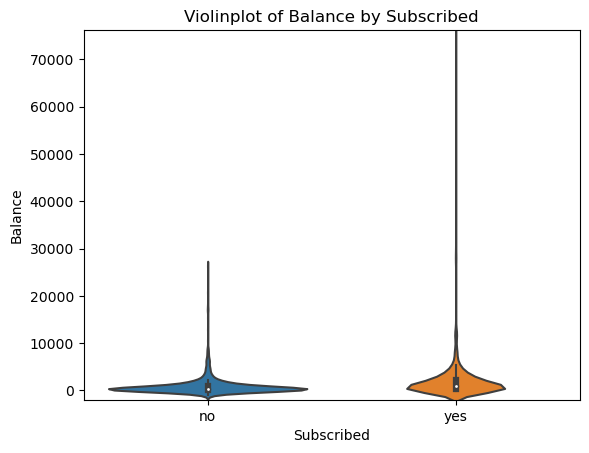

In [85]:
sns.violinplot(x="subscribed",y="balance",data=df)

# Set the title and labels
plt.title('Violinplot of Balance by Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Balance')
plt.ylim(lower_bound, upper_bound*20)
# plt.ylim()
plt.show()

<strong>Violin plot</strong> <br/>Again I had to manipulate y limit to deal with outliers. Alternatively could try filtering them out of dataframe.

<strong>Heatmap</strong>

<AxesSubplot: >

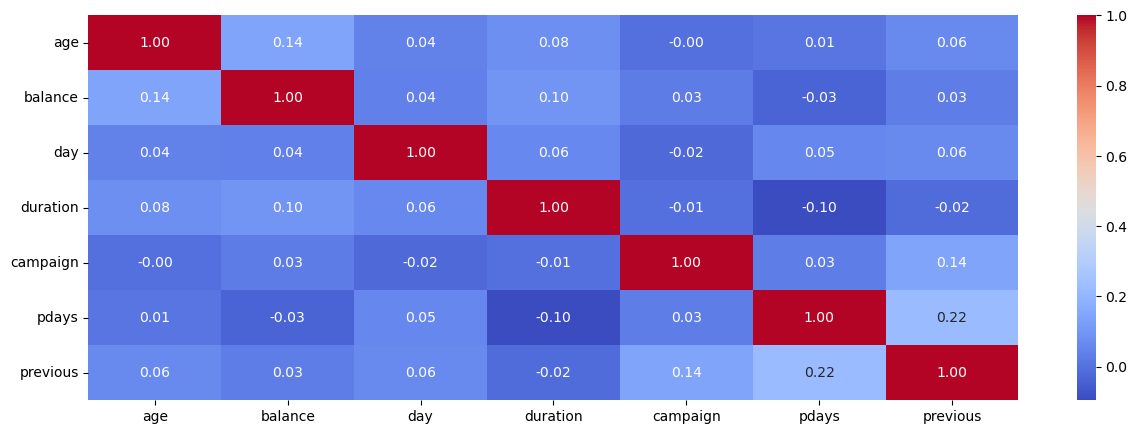

In [51]:
#correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt = ".2f", cmap = "coolwarm")

Shows correlations <> 0 for most features, most noteworthy pdays/previous(0.22) and campaign/previous(0.14) some negative values here too for example duration/pdays which will need to be understood. Maybe a PCA would help to identify important features. A pairplot will gives us a more visual interpretation of the heatmap.

In [62]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

In [94]:
pivot_table_LC = df.pivot_table(values='subscribed',
                                index='job',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
print(pivot_table_LC)



               subscribed
job                      
admin.           0.526316
blue-collar      0.258389
entrepreneur     0.333333
housemaid        0.571429
management       0.544469
retired          0.839506
self-employed    0.546875
services         0.303030
student          0.906250
technician       0.413793
unemployed       0.695652


Here the pivot table shows us the  of subscription by job type, clearly 'retired' is important here.

PCA chart shows most influential features - this is for use later on

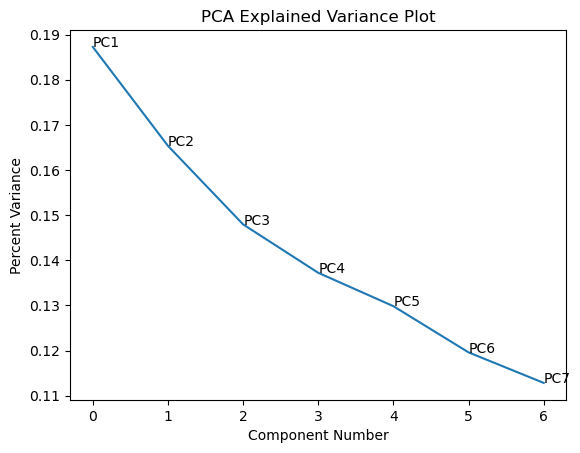

[ 0.55865467  0.51523425  0.16442869  0.43299487 -0.0614382  -0.3824994
  0.24049291]


In [63]:
df.dropna(inplace=True)
# print(df.head(5))

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Perform PCA
pca = PCA()
pca.fit(data)

# Plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component Number')
plt.ylabel('Percent Variance')
plt.title('PCA Explained Variance Plot')

# Add component labels
for i in range(len(pca.explained_variance_ratio_)):
    plt.text(i, pca.explained_variance_ratio_[i], f'PC{i+1}')

plt.show()
pc1 = pca.components_[0]
print(pc1)

# may want to reload the data from the CSV file, as the data has been modified in the previous steps.
# df = pd.read_csv('bank.csv')
